In [1]:
import matplotlib.pyplot as plt
import pandas as pd

/Users/kyoshiro.maruo/.pyenv/versions/3.7.7/lib/python3.7/importlib/_bootstrap.py:219: RuntimeWarning: numpy.ufunc size changed, may indicate binary incompatibility. Expected 192 from C header, got 216 from PyObject
  return f(*args, **kwds)
/Users/kyoshiro.maruo/.pyenv/versions/3.7.7/lib/python3.7/site-packages/pandas/compat/__init__.py:117: UserWarning: Could not import the lzma module. Your installed Python is incomplete. Attempting to use lzma compression will result in a RuntimeError.
  warnings.warn(msg)


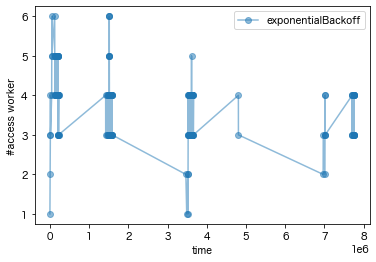

In [136]:
# jitterの種類によってアクセスの集中具合が変わることを説明するグラフ

asof = 1638486311179279000

def plot_log(name):
    res=pd.read_csv(f"../{asof}_{name}.csv")
    tmp = res[:size]
    plt.plot(tmp['time'] - tmp['time'].min(), tmp['counter'], '-o',label=name, alpha=0.5)

size = 200

# plot_log('linearTimeout')
plot_log('exponentialBackoff')
# plot_log('exponentialBackoffWithConstJitter')
# plot_log('exponentialBackoffWithHalfJitter')
# plot_log('exponentialBackoffWithFullJitter')
plt.xlabel('time')
plt.ylabel('#access worker')

plt.legend()

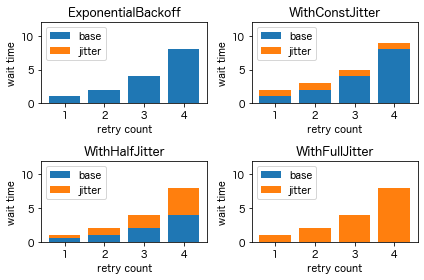

In [97]:
# jitterのパターンの種類の説明用のグラフ

x = [1,2,3,4]

def plt_retry_bar(ax, base, jitter, title):
    ax.bar(x, base, bottom=0, label='base')
    ax.bar(x, jitter, bottom=base, label='jitter')
    ax.set_xticks(x)
    ax.set_xlabel('retry count')
    ax.set_ylabel('wait time')
    ax.set_ylim(0,12)
    ax.legend()
    ax.set_title(title)
    
    
fig = plt.figure()    
plt_retry_bar(fig.add_subplot(2, 2, 1), [1,2,4,8],[0,0,0,0],'ExponentialBackoff')
plt_retry_bar(fig.add_subplot(2, 2, 2), [1,2,4,8],[1,1,1,1],'WithConstJitter')
plt_retry_bar(fig.add_subplot(2, 2, 3), [0.5,1,2,4],[0.5,1,2,4],'WithHalfJitter')
plt_retry_bar(fig.add_subplot(2, 2, 4), [0,0,0,0],[1,2,4,8],'WithFullJitter')

fig.tight_layout()

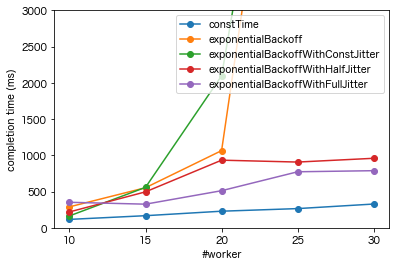

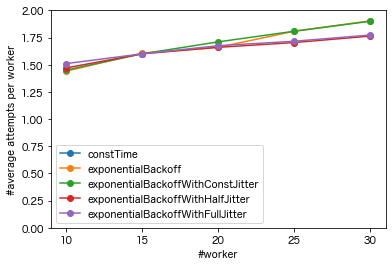

In [135]:
# 各リトライ方法の結果サマリー 横軸: ワーカー数 縦軸: リクエスト数、完了までの時間

asof = 1638489389945711000

max_worker = 30

def plot_duration(name):
    res=pd.read_csv(f"../summary_{asof}_{name}.csv")
    res = res.query('worker <= @max_worker')
    plt.plot(res['worker'], res['duration'], '-o', label=name)
    plt.xticks(res['worker'])
    plt.ylim(0,3000)
    
def plot_attempts(name):
    res=pd.read_csv(f"../summary_{asof}_{name}.csv")
    res = res.query('worker <= @max_worker')
#     plt.plot(res['worker'], res['attempts'], '-o', label=name)
#     plt.ylim(0,600)

    plt.plot(res['worker'], res['tryRate'], '-o', label=name)
    plt.ylim(0,2)

    
    plt.xticks(res['worker'])

size = 200

# plot_log('linearTimeout')
plot_duration('constTime')
plot_duration('exponentialBackoff')
plot_duration('exponentialBackoffWithConstJitter')
plot_duration('exponentialBackoffWithHalfJitter')
plot_duration('exponentialBackoffWithFullJitter')

plt.xlabel('#worker')
plt.ylabel('completion time (ms)')
plt.legend()
plt.show()

plot_attempts('constTime')
plot_attempts('exponentialBackoff')
plot_attempts('exponentialBackoffWithConstJitter')
plot_attempts('exponentialBackoffWithHalfJitter')
plot_attempts('exponentialBackoffWithFullJitter')

plt.xlabel('#worker')
plt.ylabel('#average attempts per worker')
plt.legend()
plt.show()

In [124]:
df = pd.read_csv(f"../summary_1638489261419770000_constTime.csv")
df


,worker,attempts,successCount,successRate,tryRate,duration
0,10,482,100,20.746887,4.820000,129
1,15,979,150,15.321757,6.526667,172
2,20,1910,200,10.471204,9.550000,219
3,25,3458,250,7.229612,13.832000,272
4,30,4438,300,6.759802,14.793333,331
5,35,6011,350,5.822659,17.174286,379
